# Assignment 1
We choose the dataset [Aribnb Dataset](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata) 

Information on all [attributes](https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz/edit#gid=1967362979 ) in the dataset

## Exercise 0
- (a)  What is the information you can obtain from the dataset / data sets? 
- (b)  What are the attributes in the data and what is their meaning? 
- (c)  Write a small parsing function that can read the data position (column, row)  from the file format you selected.  
- (d)  Write another function that outputs the distribution of the attributes, and counts the frequencies of the different values.  
- (e)  Try  to  describe  the  data  set  in  just  a  few  sentences.  How  is  the  data  provided?  Which  kind  of attributes are contained in the data set? How large is the data set in terms of the number of those elements (listings, reviews, vehicles, geographic regions and locations, extra records, and so on)?  
- (f) Analyze  the  errors  and  missing  values.  Write  a  function  to  count  how  many  missing  values  per attribute  and  per  entry  you  have.  Analyze  what  are  the  most  relevant  missing  values  that  might hinder the analysis according to you. 

(a) Airbnb is an American organization that offers renting and booking at inviduals, hotels and renters. 

The dataset contains in general:
- Listings
- Reviews
- Calendar


(b) Check the link [attributes](https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz/edit#gid=1967362979 )
for an elaborate explanation for each attribute

(c) 
- Folder magic
- Small parsing function
- Test

In [101]:
# I need to the os for folder magic
import os
import pandas as pd

# Creates the data folder
path_to_folder = os.getcwd()
folder_name = "Data"
path_to_new_folder = os.path.join(path_to_folder, folder_name)
if not os.path.exists (path_to_new_folder):
    os.mkdir(path_to_new_folder)
    print("\x1b[36m Created data folder \n")
else:
    print("\x1b[32m Data folder exists\n ")
    
# Checks whether file exists
dataset_name = "airbnb_open_data.csv"
path_to_dataset = os.path.join(path_to_new_folder, dataset_name)

if os.path.exists (path_to_dataset):
    print("\x1b[32m Dataset {} is loaded in succesfully!".format(dataset_name))
    
    # Load in dataset
    data = pd.read_csv(path_to_dataset)
else:
    print("\x1b[31m Dataset still needs to be put in the data folder!\n \n Go to canvas page of visualization and go to the datasets in files.\n Download the airbnb_open_data.csv and put it in the data folder.")

 Data folder exists
 
 Dataset airbnb_open_data.csv is loaded in succesfully!


C:\Users\20213032\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [102]:
# small parsing function

from typing import Union

column_names : dict = {}

def add_to_dict (dictionary : dict, index : int, element : str) -> None:
    dictionary[index] = element

[add_to_dict(column_names, k, e) for k, e in enumerate(data.columns)]

def return_column_name (dictionary : dict, index : int, show_name : bool = False) -> str:
    def _print_(string):
        print("\n \x1b[32m Used column '{}'\x1b[39m".format(string))
        
    def _exists_(string):
        exists : bool = string in dictionary.values()
        if (exists == False):
            print("\x1b[31m Column does not exist in this dataframe\x1b[39m")
            return False
    
    if type(index) == int:
        column : str = dictionary[index]
        if (show_name): 
            _print_(column)
        _exists_(column)
        return column
    
    if (show_name): 
        _print_(index)
    _exists_(index)
    return index

def parsing (data : dict, row : int, column : Union[int, str]):
    """
    data: containing the dataframe
    row: row position
    column: column position
    """
    
    column = return_column_name(column_names, column, True)
        
    
    return data[column][row]

In [103]:
# It works!
parsing(data, 1, 1)


  Used column 'NAME'


'Skylit Midtown Castle'

(d)
- Distribution function
- Distribution function test
- Frequency function
- Frequency function test

In [104]:
# Distribution function

def show_distribution (data : dict, column : Union[int, str]):
    column = return_column_name(column_names, column, True)
    
    series = data[column]
    print(series.dtype)
    
    data[column].hist()


  Used column 'room type'
object


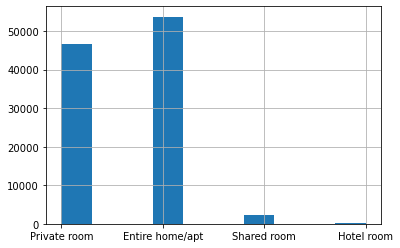

In [105]:
# Example: distribution of room_type

show_distribution(data, "room type")

In [106]:
# Write another function that outputs the distribution of the attributes, and counts the frequencies of the different values. 

def show_frequencies (data : dict, column : Union[int, str]):
    column = return_column_name(column_names, column, True)
    
    print(data[column].value_counts())

In [107]:
# This will show all the frequencies of all attributes
[show_frequencies(data, column_name) for column_name in column_names.values()]


  Used column 'id'
35562613    2
20340121    2
35580839    2
20408053    2
20387066    2
           ..
7015883     1
54730185    1
55537095    1
45839812    1
36964351    1
Name: id, Length: 102058, dtype: int64

  Used column 'NAME'
Home away from home                               33
Water View King Bed Hotel Room                    30
Hillside Hotel                                    30
New york Multi-unit building                      27
Brooklyn Apartment                                27
                                                  ..
Sun Soaked 1 Bedroom in Two Bridges                1
Modern west village one bedroom                    1
Junior 1-BR in West Village                        1
Beautiful Living! Deck& Outdoor Kitchen!           1
Quiet Comfortable private room by Times Square     1
Name: NAME, Length: 61281, dtype: int64

  Used column 'host id'
41672437747    2
95854111798    2
33358017067    2
34842022669    2
23923689443    2
              ..
4126486158     

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

(e) Description dataset

- Data is provided in a csv format
- Dataset contians: id, Name, host id, host_identity_verified, host name, neighbourhood group, neighbourhood, lat, long, 
country, country code, instant_bookable, cancellation_policy, room type, Construction year, price, service fee, 
minimum nights, number of reviews, last review, reviews per month, review rate number, calculated host listings count, 
availability 365, house_rules and license
- Thus, there are **26** attributes and each column contains **102599** rows. In total **2667574** rows.

(f)
- Function on the missing values of the selected attribute
- Test on the attribute 'id'
- Function finds missing values per entry
- Test on entry 0
- Dataframe on attribute and missing values
- Analyzation on the missing values at attributes

In [108]:
# Finds missing values in attribute
from typing import TypeVar
PandasDataFrame = TypeVar('pandas.core.frame.DataFrame')

def count_missing_values (data : dict, attribute : Union[int, str], show : bool = True) -> int:
    column = return_column_name(column_names, attribute, show)
    
    missing : int = data[column].size - data[column].dropna().size
    
    if (show):
        print("{} missing values".format(missing))
    return missing

In [109]:
count_missing_values(data, "id")


  Used column 'id'
0 missing values


0

In [117]:
# Finds missing values in row

def count_missing_values_entry (data : int, entry : int, show : bool = True) -> int:
    missing : int = data.iloc[entry].size - data.iloc[entry].dropna().size
    
    if (show):
        print("{} missing values".format(missing))
    return missing

In [118]:
count_missing_values_entry(data, 0)

1 missing values


1

In [114]:
missing_values : dict = {}

[add_to_dict(missing_values, column_name, count_missing_values(data, column_name, False))for column_name in column_names.values()]

missing_values

{'id': 0,
 'NAME': 250,
 'host id': 0,
 'host_identity_verified': 289,
 'host name': 406,
 'neighbourhood group': 29,
 'neighbourhood': 16,
 'lat': 8,
 'long': 8,
 'country': 532,
 'country code': 131,
 'instant_bookable': 105,
 'cancellation_policy': 76,
 'room type': 0,
 'Construction year': 214,
 'price': 247,
 'service fee': 273,
 'minimum nights': 409,
 'number of reviews': 183,
 'last review': 15893,
 'reviews per month': 15879,
 'review rate number': 326,
 'calculated host listings count': 319,
 'availability 365': 448,
 'house_rules': 52131,
 'license': 102597}

Analyzation on attributes. The following mentioned attributes have values missing and are according to me important

- **host_identity_verified** is crucial to quarantee the quality and safety of the customer
- **country** is crucial to know where the accomodation is. After all, airbnb is a organization that offers renting and booking at inviduals, hotels and renters. 
- **price** and **service fee** are crucial to precisely know what the costumer would be spending by staying there
- **review rate number** is crucial to know which accomodation is worth the customer's money
- **availability** is crucial for airbnb and customer to be able to plan in the various dates the customer might want to book or rent the place
- **house rules** is crucial to know what and what not to do in house. Maybe there are no house rules, but it might have been accidentally ommitted by the individual, hotel or renters.